In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
 def btc_block(img_block):
    m  = img_block.shape[0] * img_block.shape[1]
    h  = float(np.sum(img_block) / (img_block.shape[0] * img_block.shape[1]))
    h2 = float(np.sum(img_block ** 2) / (img_block.shape[0] * img_block.shape[1]))

    sigma2 = np.var(img_block)
    sigma  = np.std(img_block)

    q = img_block[np.where(img_block > h)].shape[0]
    a = h - sigma * math.sqrt(float(q) / (m - q))
    b = h + sigma * math.sqrt((m - q) / float(q))

    bitmap = np.zeros((img_block.shape[0], img_block.shape[1]))
    result = img_block.copy()

    for i in range(0, img_block.shape[0]):
        for j in range(0, img_block.shape[1]):
            if (img_block[i, j] >= h):
                bitmap[i, j] = 1
                result[i, j] = round(b, 0)
            else:
                result[i, j] = round(a, 0)

    return bitmap, result

In [3]:
 def btc_manual(img, block):
    result = img.copy()
    bitmap = img.copy()

    count = 0
    for i in range(0, img.shape[0], block):
        for j in range(0, img.shape[1], block):
            bitmap[i: i + block, j: j + block], result[i: i + block, j: j + block] = btc_block(img[i: i + block, j: j + block])
            count += 1

    return bitmap, result

In [4]:
 def btc_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    psnr = 0

    if mse == 0:
        psnr = 100
    else:
        PIXEL_MAX = 255.0
        pnsr = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


In [5]:
def plot_save(image, name, size):
    cv2.imwrite(name, image)
    fig = plt.gcf()
    fig.set_figheight(size)
    fig.set_figwidth(size)
    plt.imshow(image, cmap='gray')
    plt.show()

(512, 512)


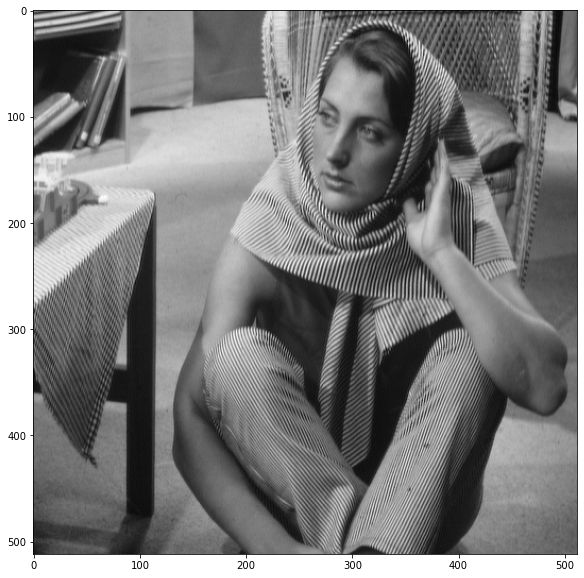

In [6]:
image = cv2.imread('barba.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)
fig = plt.gcf()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
%%time
bitmap, result = btc_manual(image, 8)

CPU times: user 1.05 s, sys: 0 ns, total: 1.05 s
Wall time: 1.04 s


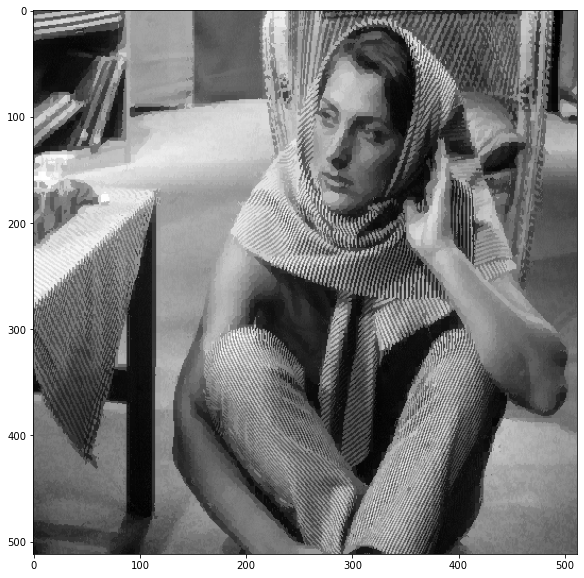

In [8]:
plot_save(result, 'BTC_Result.png', 10)

In [9]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
 

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log(max_pixel / np.sqrt(mse)) 

    return psnr


rmse_val = rmse(np.array(bitmap), np.array(result))
print("RMSE: {}".format(rmse_val))
 
psnr = PSNR(bitmap, result)
print("PNSR: {}".format(psnr))

RMSE: 10.347787489730218
PNSR: 64.08981634814224
